# Proyek Pertama : Predictive Analytics


Dataset link: https://www.kaggle.com/datasets/rajattomar132/payment-date-dataset

Kumpulan data faktur berisi informasi pembayaran sebelumnya dan perilaku berbagai pembeli. Berdasarkan pola pembayaran sebelumnya, model ML akan memprediksi tanggal pembayaran yang akan dilakukan oleh pelanggan untuk faktur. Model tersebut juga akan memprediksi kategori umur faktur berdasarkan tanggal pembayaran yang diprediksi.

## Import Library and Load Dataset

### Import Library
Cell ini mengimport library yang dibutuhkan untuk proyek ini.
- pandas: Untuk manipulasi dan analisis data.
- numpy: Untuk komputasi numerik.
- matplotlib.pyplot: Untuk membuat visualisasi data dasar.
- seaborn: Untuk membuat visualisasi data yang lebih menarik dan informatif.
- sklearn: Sebuah library machine learning di Python yang menyediakan berbagai algoritma, alat evaluasi model, dan preprocessing.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


### Load Dataset
- Cell ini memuat dataset dari URL yang diberikan ke dalam sebuah pandas DataFrame.
- pd.read_csv(url) digunakan untuk membaca file CSV langsung dari URL.
- df.head() menampilkan 5 baris pertama dari DataFrame untuk memeriksa apakah dataset telah dimuat dengan benar.


In [4]:
url = "dataset.csv"
df = pd.read_csv(url)
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR corp,2/11/2020 0:00,2020,1930438491,1/26/2020,20200125,20200126,20200210,USD,RV,1,NaN,54273.28,20200126,NAH4,1.930438e+09,0
1,U001,200980828,BEN E,8/8/2019 0:00,2019,1929646410,7/22/2019,20190722,20190722,20190811,USD,RV,1,NaN,79656.60,20190722,NAD1,1.929646e+09,0
2,U001,200792734,MDV/ trust,12/30/2019 0:00,2019,1929873765,9/14/2019,20190914,20190914,20190929,USD,RV,1,NaN,2253.86,20190914,NAA8,1.929874e+09,0
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,3/30/2020,20200330,20200330,20200410,CAD,RV,1,NaN,3299.70,20200331,CA10,2.960623e+09,1
4,U001,200769623,WAL-MAR foundation,11/25/2019 0:00,2019,1930147974,11/13/2019,20191113,20191113,20191128,USD,RV,1,NaN,33133.29,20191113,NAH4,1.930148e+09,0


### Informasi Dataset
- Cell ini menampilkan informasi mengenai DataFrame, termasuk jumlah baris, kolom, tipe data setiap kolom, dan jumlah nilai non-null.
- df.info() sangat berguna untuk mendapatkan gambaran umum tentang struktur dan kualitas data.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  int64  
 5   doc_id                  50000 non-null  int64  
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  int64  
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  int64  
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Statistik Deskriptif
- Cell ini menghasilkan statistik deskriptif untuk kolom numerik dalam DataFrame.
- df.describe() memberikan informasi seperti mean, standar deviasi, nilai minimum, nilai maksimum, dan kuartil.
- Hasil ini memberikan wawasan tentang distribusi dan rentang nilai dalam dataset.


In [6]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


## Data Cleaning & Preprocessing

### Konversi ke Datetime
- Cell ini melakukan konversi tipe data untuk kolom-kolom yang berisi informasi tanggal.
- Looping dilakukan pada setiap kolom tanggal yang ada dalam daftar `date_columns`.
- pd.to_datetime() digunakan untuk mengubah tipe data kolom menjadi datetime.
- Blok try-except digunakan untuk menangani potensi error jika format tanggal tidak sesuai.


In [7]:
# Daftar kolom tanggal yang akan dikonversi
date_columns = ['due_in_date', 'posting_date', 'baseline_create_date', 'document_create_date.1', 'document_create_date']

# Loop untuk mengkonversi setiap kolom tanggal ke tipe data datetime
for col in date_columns:
    try:
        df[col] = pd.to_datetime(df[col])
    except ValueError:
        print(f"Gagal mengkonversi kolom '{col}' ke datetime. Periksa format tanggal.")
    except Exception as e:
        print(f"Terjadi error saat mengkonversi kolom '{col}': {e}")


### Drop kolom area_business
- Cell ini menghapus kolom 'area_business' jika semua nilainya adalah null.
- df['area_business'].isnull().all() memeriksa apakah semua nilai dalam kolom 'area_business' adalah null.
- Jika kondisi terpenuhi, kolom 'area_business' dihapus menggunakan df.drop().
- Informasi penghapusan kolom dicetak ke layar.


### Informasi Dataset Setelah Preprocessing
- Cell ini mencetak informasi dataset setelah dilakukan proses pembersihan dan preprocessing data.
- Tujuannya adalah untuk melihat perubahan yang terjadi pada dataset setelah tahapan sebelumnya.


In [8]:
if df['area_business'].isnull().all():
    df.drop(columns=['area_business'], inplace=True)
    print("\nKolom 'area_business' dihapus karena seluruh nilainya null.")


Kolom 'area_business' dihapus karena seluruh nilainya null.


## Exploratory Data Analysis (EDA)

### Informasi Dataset Setelah Preprocessing
- Cell ini mencetak informasi dataset setelah dilakukan proses pembersihan dan preprocessing data.
- Tujuannya adalah untuk melihat perubahan yang terjadi pada dataset setelah tahapan sebelumnya.


In [9]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              40000 non-null  object        
 4   buisness_year           50000 non-null  int64         
 5   doc_id                  50000 non-null  int64         
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  datetime64[ns]
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              5

### Statistik Deskriptif Setelah Preprocessing
- Cell ini kembali menampilkan statistik deskriptif setelah pembersihan dan preprocessing.
- Hal ini dilakukan untuk melihat bagaimana statistik dataset berubah setelah preprocessing.


In [10]:
print("Statistik Deskriptif:")
df.describe()

Statistik Deskriptif:


,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,posting_id,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,50000,50000,50000,50000,50000.0,50000.000000,50000,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2019-09-11 21:07:06.816000,1970-01-01 00:00:00.020193514,1970-01-01 00:00:00.020193537,1970-01-01 00:00:00.020193679,1.0,32337.021651,1970-01-01 00:00:00.020193539,2.011340e+09,0.200000
min,2019.000000,1.928502e+09,2018-12-30 00:00:00,1970-01-01 00:00:00.020181226,1970-01-01 00:00:00.020181230,1970-01-01 00:00:00.020181224,1.0,0.720000,1970-01-01 00:00:00.020181214,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2019-05-06 00:00:00,1970-01-01 00:00:00.020190505,1970-01-01 00:00:00.020190506,1970-01-01 00:00:00.020190524,1.0,4928.312500,1970-01-01 00:00:00.020190505,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2019-09-09 00:00:00,1970-01-01 00:00:00.020190908,1970-01-01 00:00:00.020190909,1970-01-01 00:00:00.020190926,1.0,17609.010000,1970-01-01 00:00:00.020190909,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2020-01-31 00:00:00,1970-01-01 00:00:00.020200130,1970-01-01 00:00:00.020200131,1970-01-01 00:00:00.020200216,1.0,47133.635000,1970-01-01 00:00:00.020200131,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2020-05-22 00:00:00,1970-01-01 00:00:00.020200522,1970-01-01 00:00:00.020200522,1970-01-01 00:00:00.020200710,1.0,668593.360000,1970-01-01 00:00:00.020200522,2.960636e+09,1.000000
std,0.460708,2.885235e+08,NaN,NaN,NaN,NaN,0.0,39205.975231,NaN,2.766335e+08,0.400004


### Distribusi Nilai Unik Kolom Kategorikal
- Cell ini mencetak distribusi nilai unik untuk setiap kolom kategorikal.
- Looping dilakukan pada setiap kolom dengan tipe data 'object' (yang umumnya berisi data kategorikal).
- df[col].nunique() digunakan untuk menghitung jumlah nilai unik dalam setiap kolom.


In [11]:
print("\nDistribusi Nilai Unik untuk Kolom Kategorikal:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")


Distribusi Nilai Unik untuk Kolom Kategorikal:
business_code: 6 unique values
cust_number: 1099 unique values
name_customer: 4197 unique values
clear_date: 403 unique values
invoice_currency: 2 unique values
document type: 2 unique values
cust_payment_terms: 74 unique values


### Distribusi Total Open Amount
- Cell ini membuat histogram yang menampilkan distribusi dari 'total_open_amount'.
- sns.histplot() digunakan untuk membuat histogram dengan 50 bins.
- kde=True menambahkan kurva kernel density estimate ke plot.
- plt.title(), plt.xlabel(), plt.ylabel() digunakan untuk memberikan judul dan label pada plot.


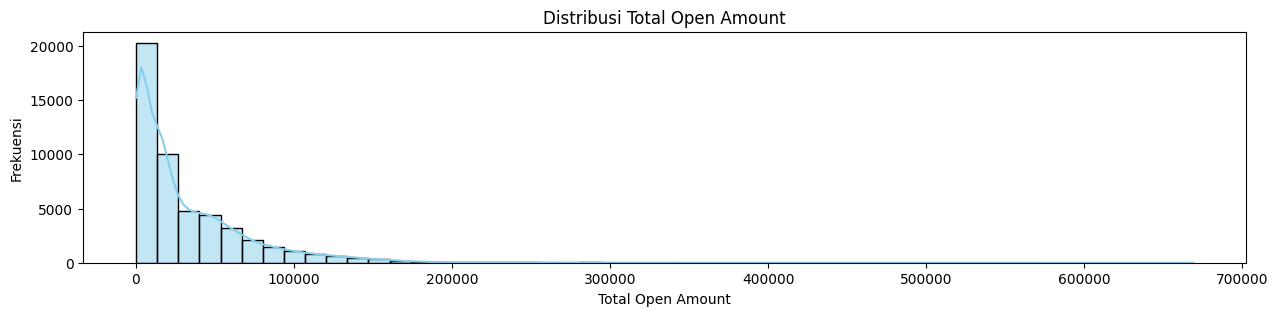

In [12]:
plt.figure(figsize=(15,3))
sns.histplot(df['total_open_amount'], bins=50, kde=True, color='skyblue')
plt.title('Distribusi Total Open Amount')
plt.xlabel('Total Open Amount')
plt.ylabel('Frekuensi')
plt.show()

### Distribusi Invoice Currency
- Cell ini membuat countplot untuk menampilkan distribusi 'invoice_currency'.
- sns.countplot() digunakan untuk menghitung jumlah kemunculan setiap kategori dalam kolom.
- palette='Set2' memberikan warna yang berbeda pada setiap bar.


<ipython-input-13-24ec799908f7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='invoice_currency', palette='Set2')


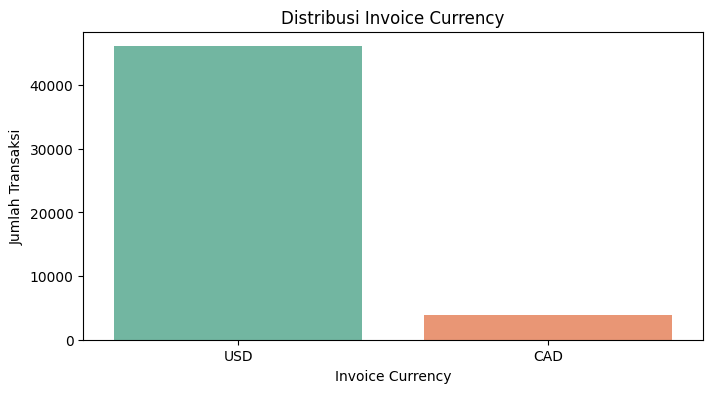

In [13]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='invoice_currency', palette='Set2')
plt.title('Distribusi Invoice Currency')
plt.xlabel('Invoice Currency')
plt.ylabel('Jumlah Transaksi')
plt.show()


### Distribusi Customer Payment Terms
- Cell ini membuat countplot untuk menampilkan distribusi 'cust_payment_terms'.
- order=df['cust_payment_terms'].value_counts().index digunakan untuk mengurutkan bar berdasarkan frekuensi kemunculan.
- xticks(rotation=45) memutar label sumbu x agar lebih mudah dibaca.


<ipython-input-14-9b7e2afe4c42>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cust_payment_terms', order=df['cust_payment_terms'].value_counts().index, palette='Set3')


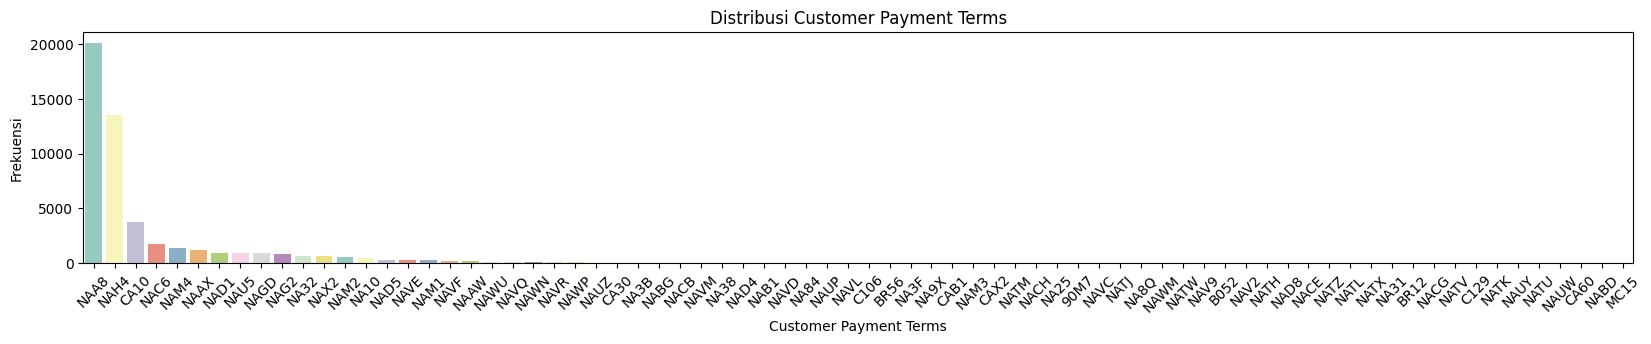

In [14]:
plt.figure(figsize=(20,3))
sns.countplot(data=df, x='cust_payment_terms', order=df['cust_payment_terms'].value_counts().index, palette='Set3')
plt.title('Distribusi Customer Payment Terms')
plt.xlabel('Customer Payment Terms')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()


### Jumlah Transaksi per Hari
- Cell ini membuat time series plot untuk menampilkan jumlah transaksi per hari.
- df_time.set_index('posting_date', inplace=True) mengatur kolom 'posting_date' sebagai index.
- df_time.resample('D').size() menghitung jumlah transaksi untuk setiap hari.


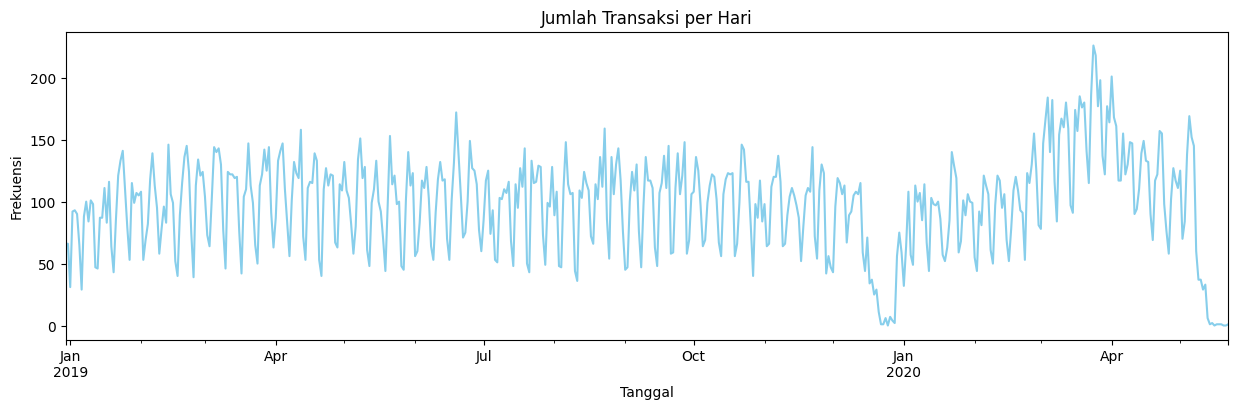

In [15]:
df_time = df.copy()
df_time.set_index('posting_date', inplace=True)

# Hitung jumlah transaksi per hari
daily_transactions = df_time.resample('D').size()

plt.figure(figsize=(15,4))
daily_transactions.plot(color='skyblue')
plt.title('Jumlah Transaksi per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Frekuensi')
plt.show()


### Total Open Amount per Hari
- Cell ini membuat time series plot untuk menampilkan total 'total_open_amount' per hari.
- df_time['total_open_amount'].resample('D').sum() menghitung total amount untuk setiap hari.


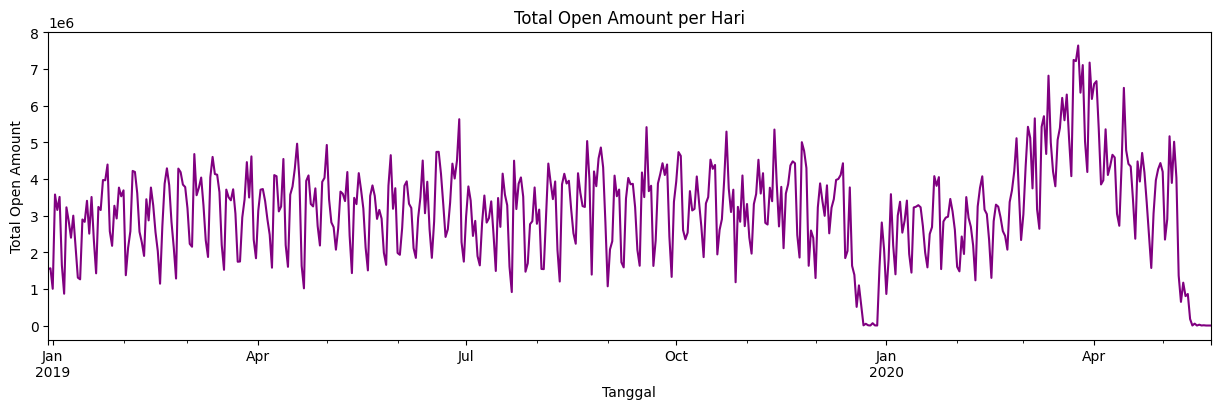

In [16]:
daily_total = df_time['total_open_amount'].resample('D').sum()

plt.figure(figsize=(15,4))
daily_total.plot(color='purple')
plt.title('Total Open Amount per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Total Open Amount')
plt.show()


### Heatmap Korelasi
- Cell ini membuat heatmap untuk menampilkan matriks korelasi antar kolom numerik.
- df.select_dtypes(include=['int64', 'float64']).columns memilih kolom numerik.
- df[numeric_cols].corr() menghitung matriks korelasi.
- sns.heatmap() membuat heatmap dengan anotasi nilai korelasi.


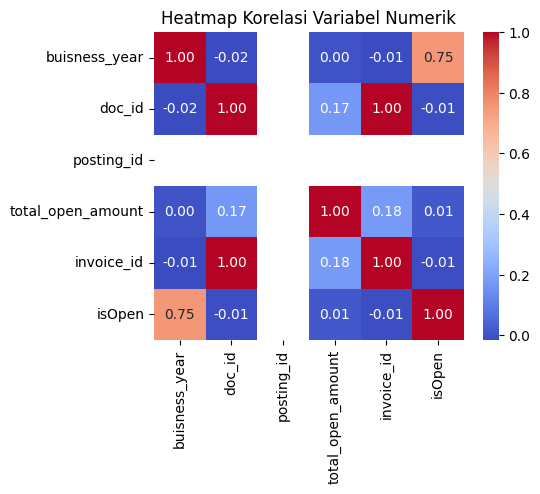

In [17]:
plt.figure(figsize=(5,4))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()


## Modeling

### Pemilihan Fitur dan Target
- Cell ini mendefinisikan fitur (variabel independen) dan target (variabel dependen) yang akan digunakan dalam pemodelan.
- target = 'isOpen' menentukan kolom 'isOpen' sebagai target.
- features berisi daftar kolom yang akan digunakan sebagai fitur.


In [18]:
# Misalnya, kita gunakan beberapa fitur yang dianggap relevan dan mengabaikan kolom yang tidak diperlukan.
# Target: 'isOpen'
target = 'isOpen'
# Contoh fitur yang akan digunakan; sesuaikan dengan pemahaman data Anda.
features = ['business_code', 'buisness_year', 'doc_id', 'total_open_amount',
            'invoice_currency', 'document type', 'cust_payment_terms']


### Pemisahan Fitur Numerik dan Kategorikal
- Cell ini memisahkan daftar fitur menjadi dua kategori: numerik dan kategorikal.
- categorical_features berisi daftar kolom yang bersifat kategorikal.
- numeric_features berisi daftar kolom yang bersifat numerik (dihitung berdasarkan selisih antara features dan categorical_features).


In [19]:
# Menentukan Fitur Numerik dan Kategorikal
categorical_features = ['business_code', 'invoice_currency', 'document type', 'cust_payment_terms']
numeric_features = [col for col in features if col not in categorical_features]
print("Fitur Numerik:", numeric_features)
print("Fitur Kategorikal:", categorical_features)


Fitur Numerik: ['buisness_year', 'doc_id', 'total_open_amount']
Fitur Kategorikal: ['business_code', 'invoice_currency', 'document type', 'cust_payment_terms']


### Preprocessing Pipeline
- Cell ini mendefinisikan preprocessing pipeline untuk fitur numerik dan kategorikal.
- StandardScaler() digunakan untuk melakukan scaling pada fitur numerik.
- OneHotEncoder() digunakan untuk melakukan one-hot encoding pada fitur kategorikal.
- ColumnTransformer digunakan untuk menerapkan transformasi yang berbeda pada kolom yang berbeda.


In [20]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


### Pembagian Data Training dan Testing
- Cell ini membagi dataset menjadi data training dan data testing.
- train_test_split() digunakan untuk membagi data dengan proporsi 80% untuk training dan 20% untuk testing.
- random_state=42 digunakan untuk menghasilkan pembagian data yang sama setiap kali kode dijalankan.
- Shape dari masing-masing set data dicetak ke layar.


In [21]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)


Shape X_train: (40000, 7)
Shape X_test: (10000, 7)
Shape y_train: (40000,)
Shape y_test: (10000,)


### Logistic Regression
- Cell ini membangun dan melatih model Logistic Regression.
- Pipeline digunakan untuk menggabungkan preprocessing dan pemodelan menjadi satu kesatuan.
- max_iter=1000 mengatur jumlah iterasi maksimum untuk konvergensi.
- classification_report() dan confusion_matrix() digunakan untuk mengevaluasi performa model.


In [22]:
# --- Model Baseline: Logistic Regression ---
clf_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)

print("=== Logistic Regression ===")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))



=== Logistic Regression ===
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      8029
           1       0.66      0.96      0.78      1971

    accuracy                           0.90     10000
   macro avg       0.83      0.92      0.86     10000
weighted avg       0.92      0.90      0.90     10000

Confusion Matrix:
[[7064  965]
 [  77 1894]]


### ROC Curve Logistic Regression
- Cell ini membuat ROC curve untuk model Logistic Regression.
- predict_proba() digunakan untuk mendapatkan probabilitas prediksi.
- roc_curve() menghitung false positive rate (FPR) dan true positive rate (TPR) untuk berbagai thresholds.
- auc() menghitung area under the ROC curve (AUC).
- Plot ROC curve divisualisasikan menggunakan matplotlib.


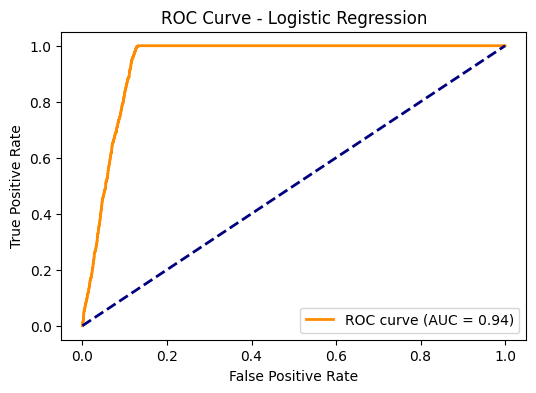

In [23]:
# Plot ROC Curve untuk Logistic Regression
y_pred_proba_lr = clf_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(6, 4))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


### Random Forest
- Cell ini membangun dan melatih model Random Forest.
- Sama seperti Logistic Regression, digunakan Pipeline untuk menggabungkan preprocessing dan pemodelan.
- classification_report() dan confusion_matrix() digunakan untuk mengevaluasi performa model.


In [24]:
# --- Model Alternatif: Random Forest ---
clf_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

print("\n=== Random Forest ===")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))




=== Random Forest ===
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8029
           1       0.99      0.99      0.99      1971

    accuracy                           1.00     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       1.00      1.00      1.00     10000

Confusion Matrix:
[[8012   17]
 [  17 1954]]


### ROC Curve Random Forest
- Cell ini membuat ROC curve untuk model Random Forest.
- predict_proba(), roc_curve(), dan auc() digunakan seperti pada model Logistic Regression.
- Plot ROC curve divisualisasikan menggunakan matplotlib.


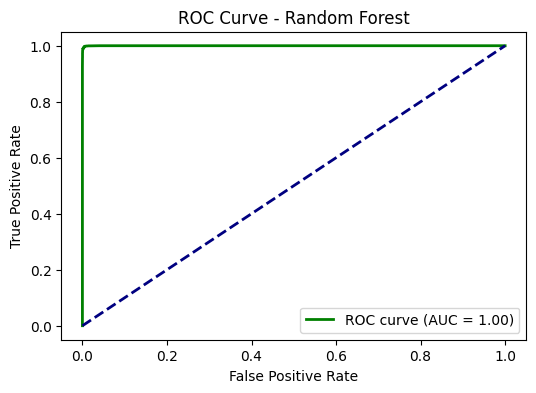

In [25]:
# Plot ROC Curve untuk Random Forest
y_pred_proba_rf = clf_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


## Hyperparameter Tuning Random Forest
- Cell ini melakukan hyperparameter tuning pada model Random Forest menggunakan GridSearchCV.
- param_grid mendefinisikan parameter yang akan diuji.
- GridSearchCV mencari kombinasi parameter terbaik menggunakan cross-validation (cv=5).
- scoring='f1' digunakan sebagai metrik evaluasi.
- n_jobs=-1 menggunakan semua core CPU untuk mempercepat proses.
- Parameter terbaik yang ditemukan dicetak ke layar.


In [26]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(clf_rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\n=== Hasil Hyperparameter Tuning ===")
print("Best parameters found: ", grid_search.best_params_)



=== Hasil Hyperparameter Tuning ===
Best parameters found:  {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


### Evaluasi Model Random Forest Terbaik
- Cell ini mengevaluasi performa model Random Forest terbaik yang dihasilkan dari hyperparameter tuning.
- grid_search.best_estimator_ mengambil model dengan parameter terbaik.
- best_rf.predict(X_test) digunakan untuk membuat prediksi pada data testing.
- classification_report() dan confusion_matrix() digunakan untuk menampilkan metrik evaluasi model terbaik.


In [27]:
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("\n=== Best Random Forest ===")
print("Classification Report:")
print(classification_report(y_test, y_pred_best_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))



=== Best Random Forest ===
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8029
           1       0.99      0.99      0.99      1971

    accuracy                           1.00     10000
   macro avg       1.00      0.99      0.99     10000
weighted avg       1.00      1.00      1.00     10000

Confusion Matrix:
[[8015   14]
 [  18 1953]]


### ROC Curve Random Forest Terbaik
- Cell ini membuat ROC curve untuk model Random Forest terbaik setelah hyperparameter tuning.
- predict_proba(), roc_curve(), dan auc() digunakan seperti pada model sebelumnya.
- Plot ROC curve divisualisasikan menggunakan matplotlib untuk melihat performa model terbaik secara visual.
- Hasil AUC menunjukkan kemampuan model dalam membedakan antara kelas positif dan negatif.


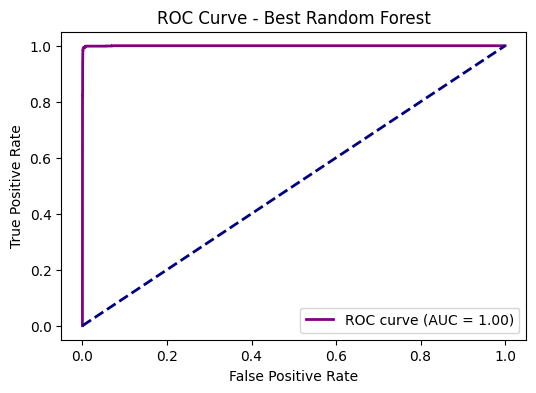

In [28]:
# Plot ROC Curve untuk model terbaik
y_pred_proba_best_rf = best_rf.predict_proba(X_test)[:, 1]
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_proba_best_rf)
roc_auc_best = auc(fpr_best, tpr_best)

plt.figure(figsize=(6, 4))
plt.plot(fpr_best, tpr_best, color='purple', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_best)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Random Forest')
plt.legend(loc="lower right")
plt.show()
